# Overview

## Business Problem

## Business Value

# Data

## Data Loading/ Understanding

In [1]:
import gzip
import csv
import json
import pandas as pd
import numpy as np;

In [2]:
pwd

'D:\\Flatiron\\Project1\\dsc-phase-1-project'

In [3]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is C649-A6AD

 Directory of D:\Flatiron\Project1\dsc-phase-1-project

09/02/2021  01:51 AM    <DIR>          .
09/02/2021  01:51 AM    <DIR>          ..
08/15/2021  03:30 PM               152 .canvas
08/15/2021  03:30 PM                80 .gitignore
08/23/2021  05:34 AM    <DIR>          .ipynb_checkpoints
08/15/2021  03:30 PM         1,425,341 awesome.gif
08/15/2021  03:30 PM             1,846 CONTRIBUTING.md
08/22/2021  11:10 AM    <DIR>          jupyter_contrib_nbextensions
08/15/2021  03:30 PM             1,357 LICENSE.md
09/02/2021  01:51 AM           606,604 Phase_1_project.ipynb
08/15/2021  03:30 PM             4,676 README.md
08/23/2021  05:35 AM             1,483 student.ipynb
08/23/2021  05:32 AM           594,370 Untitled.ipynb
08/23/2021  02:29 AM    <DIR>          zippedData
               9 File(s)      2,635,909 bytes
               5 Dir(s)  2,000,009,633,792 bytes free


In [4]:
cd zippedData/

D:\Flatiron\Project1\dsc-phase-1-project\zippedData


In [5]:
movie_gross  = pd.read_csv('bom.movie_gross.csv.gz', compression = 'gzip')
movie_gross.head(1)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010


In [6]:
name_basics  = pd.read_csv('imdb.name.basics.csv.gz', compression = 'gzip')
name_basics.head(1)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"


In [7]:
akas   = pd.read_csv('imdb.title.akas.csv.gz', compression = 'gzip')
akas.head(1)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0


In [8]:
basics = pd.read_csv('imdb.title.basics.csv.gz', compression = 'gzip')
basics.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


In [9]:
crew   = pd.read_csv('imdb.title.crew.csv.gz', compression = 'gzip')
crew.head(1)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854


In [10]:
principals = pd.read_csv('imdb.title.principals.csv.gz', compression = 'gzip')
principals.head(1)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"


In [11]:
ratings = pd.read_csv('imdb.title.ratings.csv.gz', compression = 'gzip')
ratings.head(1)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31


In [12]:
movie_info = pd.read_csv('rt.movie_info.tsv.gz', compression = 'gzip', delimiter="\t")
movie_info.head(1)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN


In [13]:
reviews = pd.read_csv('rt.reviews.tsv.gz', compression = 'gzip', delimiter= "\t",encoding = 'unicode_escape')
reviews.head(1)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"


In [14]:
movies = pd.read_csv('tmdb.movies.csv.gz', compression = 'gzip')
movies.head(1)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


In [15]:
budgets = pd.read_csv('tn.movie_budgets.csv.gz', compression = 'gzip')
budgets.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


## Data Preparation

In [16]:
#change str to int
def revise_str_to_int(x):
    if isinstance(x,str):
        x = float(x.replace(',', '').replace('$', ''))
    else:
        x = 0        
    return x

In [17]:
# merge ratings, basics, akas. drop column. 
movie_rating = akas.merge(ratings, left_on = 'title_id', right_on = 'tconst')
movie_rating = movie_rating.merge(basics, left_on = 'tconst', right_on = 'tconst')
movie_rating = movie_rating.drop_duplicates(subset=['primary_title'])
movie_rating_with_crew = movie_rating.drop_duplicates(subset=['primary_title'])
movie_rating.head(1)

,title_id,ordering,title,region,language,types,attributes,is_original_title,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,tt0369610,7.0,539338,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi"


In [18]:
#change budget str(production_budget and worldwide_gross) to int
budgets['production_budget'] = budgets['production_budget'].map(revise_str_to_int)
budgets['worldwide_gross'] = budgets['worldwide_gross'].map(revise_str_to_int)
budgets['profit_ratio'] = (budgets['worldwide_gross']/budgets['production_budget'])
update_budgets = budgets.sort_values(by='profit_ratio', ascending = False)
update_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_ratio
5745,46,"Jun 30, 1972",Deep Throat,25000.0,"$45,000,000",45000000.0,1800.000000
5613,14,"Mar 21, 1980",Mad Max,200000.0,"$8,750,000",99750000.0,498.750000
5492,93,"Sep 25, 2009",Paranormal Activity,450000.0,"$107,918,810",194183034.0,431.517853
5679,80,"Jul 10, 2015",The Gallows,100000.0,"$22,764,410",41656474.0,416.564740
5406,7,"Jul 14, 1999",The Blair Witch Project,600000.0,"$140,539,099",248300000.0,413.833333


In [19]:
#drop unnecessary column
ignore1 = ['language', 'types', 'tconst', 'is_original_title', 'region', 'attributes', 'original_title', 'title']
movie_rating = movie_rating.drop(ignore1, axis = 1)
movie_rating = movie_rating.sort_values(by='averagerating', ascending = False)

In [20]:
#change str to int
movie_rating.loc['genres'] = movie_rating['genres'].str.split().str.get(0)
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].map(revise_str_to_int)

In [21]:
#drop unnecessary column
movie_rating = movie_rating[movie_rating['genres'].notnull()]
ignore2 = ['ordering', 'averagerating', 'numvotes','title_id']
movie_rating = movie_rating.drop(ignore2, axis = 1)
movie_rating.head(10)

,primary_title,start_year,runtime_minutes,genres
150912,Revolution Food,2015.0,70.0,Documentary
54768,Exteriores: Mulheres Brasileiras na Diplomacia,2018.0,52.0,Documentary
162413,I Was Born Yesterday!,2015.0,31.0,Documentary
195998,The Paternal Bond: Barbary Macaques,2015.0,59.0,Documentary
212159,Fly High: Story of the Disc Dog,2019.0,65.0,Documentary
184717,Requiem voor een Boom,2016.0,48.0,Documentary
206826,Ellis Island: The Making of a Master Race in A...,2018.0,70.0,"Documentary,History"
251823,Calamity Kevin,2019.0,77.0,"Adventure,Comedy"
182419,All Around Us,2019.0,NaN,Documentary
53172,Freeing Bernie Baran,2010.0,100.0,"Crime,Documentary"


### Step 1
 We start with creating a new dataframe from the series with EmployeeId as the index
 movie_rating = pd.DataFrame(movie_rating.genres.str.split(',').tolist(), index=movie_rating.primary_title).stack()
### Step 2
 We now want to get rid of the secondary index
 To do this, we will make EmployeeId as a column (it can't be an index since the values will be duplicate)
 movie_rating = movie_rating.reset_index([0, 'primary_title'])
### Step 3
 movie_rating.columns = ['primary_title', 'start_year','runtime_minutes','genres']

In [22]:
from itertools import chain

# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split(',')))

# calculate lengths of splits
lens = movie_rating['genres'].str.split(',').map(len)

# create new dataframe, repeating or chaining as appropriate
movie_rating = pd.DataFrame({'primary_title': np.repeat(movie_rating['primary_title'], lens),
                    'start_year': np.repeat(movie_rating['start_year'], lens),
                    'runtime_minutes': np.repeat(movie_rating['runtime_minutes'], lens),
                    'genres': chainer(movie_rating['genres'])})

movie_rating.head(10)


,primary_title,start_year,runtime_minutes,genres
150912,Revolution Food,2015.0,70.0,Documentary
54768,Exteriores: Mulheres Brasileiras na Diplomacia,2018.0,52.0,Documentary
162413,I Was Born Yesterday!,2015.0,31.0,Documentary
195998,The Paternal Bond: Barbary Macaques,2015.0,59.0,Documentary
212159,Fly High: Story of the Disc Dog,2019.0,65.0,Documentary
184717,Requiem voor een Boom,2016.0,48.0,Documentary
206826,Ellis Island: The Making of a Master Race in A...,2018.0,70.0,Documentary
206826,Ellis Island: The Making of a Master Race in A...,2018.0,70.0,History
251823,Calamity Kevin,2019.0,77.0,Adventure
251823,Calamity Kevin,2019.0,77.0,Comedy


In [23]:
#get count for each type of movie
movie_rating = movie_rating.merge(update_budgets, left_on = 'primary_title', right_on = 'movie')
movie_rating = movie_rating.set_index('start_year').sort_index()
movie_rating['genres'].value_counts()

Drama          1101
Comedy          658
Action          537
Adventure       415
Thriller        374
Crime           313
Horror          270
Romance         260
Sci-Fi          176
Mystery         174
Biography       166
Fantasy         159
Animation       123
Family          120
Documentary     112
Music            65
History          54
Sport            46
War              26
Western          14
Musical          11
News              1
Name: genres, dtype: int64

<AxesSubplot:xlabel='runtime_minutes'>

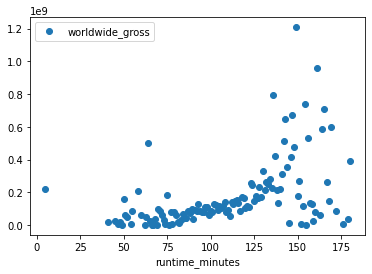

In [79]:
# movie_rating.head(10)
movie_rating_time = movie_rating
movie_rating_time = movie_rating_time.groupby(['runtime_minutes']).mean()
movie_rating_time = movie_rating_time.sort_values(['worldwide_gross'],ascending=False)
movie_rating_time.reset_index(inplace=True)
movie_rating_time
movie_rating_time.plot(x='runtime_minutes', y='worldwide_gross', style='o')
# # calculate polynomial
# z = movie_rating.polyfit(x, y, 3)
# f = movie_rating.poly1d(z)

# # calculate new x's and y's
# x_new = movie_rating.linspace(x[0], x[-1], 50)
# y_new = f(x_new)

# plt.plot(x='runtime_minutes', y='worldwide_gross', style='o', x_new, y_new)
# plt.xlim([x[0]-1, x[-1] + 1 ])
# plt.show()

In [24]:
#ignore unnecessary column
ignore3 = ['id', 'release_date', 'movie', 'domestic_gross', 'production_budget', 'profit_ratio', 'primary_title', 'runtime_minutes']
movie_type_yearly_change = movie_rating.drop(ignore3, axis = 1)
movie_type_yearly_change = movie_type_yearly_change.reset_index()
movie_type_yearly_change.head(10)

,start_year,genres,worldwide_gross
0,2010.0,Sport,408159.0
1,2010.0,Comedy,86796502.0
2,2010.0,Fantasy,223050874.0
3,2010.0,Family,223050874.0
4,2010.0,Adventure,223050874.0
5,2010.0,Drama,109383.0
6,2010.0,Drama,24687524.0
7,2010.0,Romance,24687524.0
8,2010.0,Drama,1869928.0
9,2010.0,Family,27469621.0


In [25]:
#each year average gross for each type
movie_type_yearly_change['typr_worldwide_gross'] = movie_type_yearly_change.groupby(["genres", "start_year"])["worldwide_gross"].transform(sum)
ignore4 = ['worldwide_gross']
movie_type_yearly_change = movie_type_yearly_change.drop(ignore4, axis = 1)
movie_type_yearly_change = movie_type_yearly_change.drop_duplicates()
movie_type_yearly_change.head(30)


,start_year,genres,typr_worldwide_gross
0,2010.0,Sport,1.424901e+09
1,2010.0,Comedy,9.038683e+09
2,2010.0,Fantasy,4.117297e+09
3,2010.0,Family,4.661382e+09
4,2010.0,Adventure,1.248603e+10
5,2010.0,Drama,1.024385e+10
7,2010.0,Romance,3.011842e+09
10,2010.0,Western,2.626612e+08
11,2010.0,War,1.616975e+08
24,2010.0,Horror,1.977537e+09


In [26]:
# find top 5 profit movie type
top5_movie_type_yearly_change = movie_type_yearly_change
top5_movie_type_yearly_change['total_profit'] = top5_movie_type_yearly_change.groupby(['genres'])['typr_worldwide_gross'].transform(lambda x: x.sum())
top5_movie_type_yearly_change =  top5_movie_type_yearly_change.drop_duplicates('genres',keep='first')
top5_movie_type_yearly_change = top5_movie_type_yearly_change.sort_values(['typr_worldwide_gross','start_year'],ascending=False).head(5)
top5_movie_type_yearly_change

,start_year,genres,typr_worldwide_gross,total_profit
4,2010.0,Adventure,1.248603e+10,1.291672e+11
5,2010.0,Drama,1.024385e+10,6.772980e+10
1,2010.0,Comedy,9.038683e+09,7.352513e+10
45,2010.0,Action,8.208930e+09,1.121659e+11
3,2010.0,Family,4.661382e+09,1.913715e+10


<AxesSubplot:xlabel='start_year'>

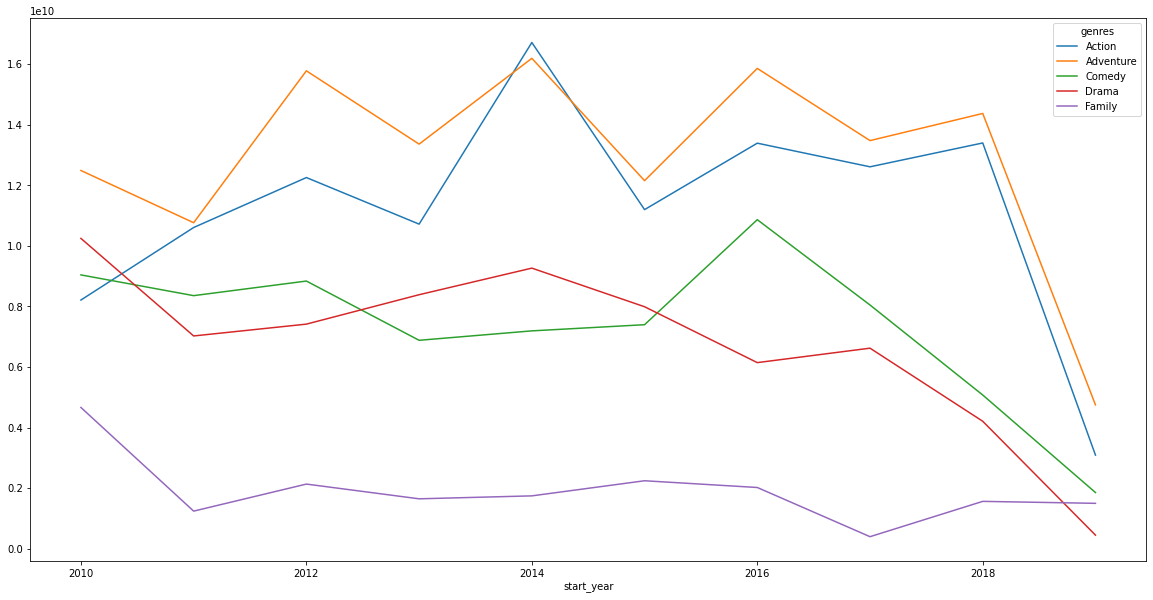

In [53]:
#drow top 5 profit movie type, profit change as years goes by
top5_movie_type_yearly_change1 = movie_type_yearly_change.loc[(movie_type_yearly_change['genres'] == 'Adventure') | (movie_type_yearly_change['genres'] == 'Drama') | (movie_type_yearly_change['genres'] == 'Comedy') | (movie_type_yearly_change['genres'] == 'Action') | (movie_type_yearly_change['genres'] == 'Family')]
top5_movie_type_yearly_change1 = top5_movie_type_yearly_change1.drop('total_profit', axis = 1)
top5_movie_type_yearly_change1 = top5_movie_type_yearly_change1.pivot(index='start_year', columns='genres', values='typr_worldwide_gross')
top5_movie_type_yearly_change1.plot(figsize=(20, 10))

In [28]:
# import seaborn as sns
# sns.lineplot(data=movie_type_yearly_change, x="start_year", y="typr_worldwide_gross")

In [29]:
movie_rating.corr()

,runtime_minutes,id,production_budget,worldwide_gross,profit_ratio
runtime_minutes,1.000000,-0.049314,0.341076,0.300475,-0.025696
id,-0.049314,1.000000,-0.062244,-0.037656,0.016387
production_budget,0.341076,-0.062244,1.000000,0.782909,-0.045857
worldwide_gross,0.300475,-0.037656,0.782909,1.000000,0.080536
profit_ratio,-0.025696,0.016387,-0.045857,0.080536,1.000000


In [30]:
movie_rating.corr()['worldwide_gross']

runtime_minutes      0.300475
id                  -0.037656
production_budget    0.782909
worldwide_gross      1.000000
profit_ratio         0.080536
Name: worldwide_gross, dtype: float64

In [31]:
movie_rating.corr()['worldwide_gross'].nlargest(2)

worldwide_gross      1.000000
production_budget    0.782909
Name: worldwide_gross, dtype: float64

In [32]:
movie_rating.corr()["worldwide_gross"].nsmallest(3)

id                -0.037656
profit_ratio       0.080536
runtime_minutes    0.300475
Name: worldwide_gross, dtype: float64

In [33]:
movie_rating_with_crew = movie_rating_with_crew.merge(crew, on = 'tconst')
movie_rating_with_crew.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,tt0369610,7.0,539338,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341"
1,tt0381957,1,Cloud Cuckoo Land,GB,NaN,NaN,NaN,0.0,tt0381957,7.6,23,Cloud Cuckoo Land,Cloud Cuckoo Land,2012,92.0,Drama,nm1458371,"nm1458371,nm1461088"
2,tt0401729,10,Джон Картер: Мiж двох свiтiв,UA,NaN,NaN,NaN,0.0,tt0401729,6.6,241792,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",nm0004056,"nm0004056,nm0028764,nm0149290,nm0123194"
3,tt10010134,1,Versailles Rediscovered - The Sun King's Vanis...,NaN,NaN,original,NaN,1.0,tt10010134,7.0,5,Versailles Rediscovered - The Sun King's Vanis...,Versailles Rediscovered - The Sun King's Vanis...,2019,52.0,Documentary,nm2205937,"nm2205937,nm1355962,nm10542772,nm0873469"
4,tt10084780,1,Vinara sodara veera kumara,IN,NaN,NaN,NaN,0.0,tt10084780,8.3,30,Vinara sodara veera kumara,Vinara sodara veera kumara,2019,NaN,"Drama,Romance",nm10574727,NaN


In [34]:
movie_rating_with_crew = movie_rating_with_crew.merge(principals, on = 'tconst')
movie_rating_with_crew.head()

,title_id,ordering_x,title,region,language,types,attributes,is_original_title,tconst,averagerating,...,start_year,runtime_minutes,genres,directors,writers,ordering_y,nconst,category,job,characters
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,tt0369610,7.0,...,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",10,nm0189777,producer,producer,NaN
1,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,tt0369610,7.0,...,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",1,nm0695435,actor,NaN,"[""Owen""]"
2,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,tt0369610,7.0,...,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",2,nm0397171,actress,NaN,"[""Claire""]"
3,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,tt0369610,7.0,...,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",3,nm1339223,actor,NaN,"[""Gray""]"
4,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0,tt0369610,7.0,...,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",4,nm0339460,actress,NaN,"[""Karen""]"


In [35]:
#each movie with average rate
movie_rating_with_director = movie_rating_with_crew[['primary_title','directors', 'averagerating']]
movie_rating_with_director = movie_rating_with_director.drop_duplicates()
# movie_rating_with_director.head(50)

,primary_title,directors,averagerating
0,Jurassic World,nm1119880,7.0
10,Cloud Cuckoo Land,nm1458371,7.6
20,John Carter,nm0004056,6.6
30,Versailles Rediscovered - The Sun King's Vanis...,nm2205937,7.0
40,Vinara sodara veera kumara,nm10574727,8.3
50,Alice in Wonderland,nm0000318,6.5
60,From Paris with Love,nm0603628,6.5
70,Dark Buenos Aires,nm1413776,3.4
80,The Bourne Legacy,nm0006904,6.7
90,Snatched!,nm1370224,5.9


In [36]:
#merge movie with crew name as desc order
movie_rating_with_director_top10 = movie_rating_with_director.groupby(['directors']).mean().head(10)
movie_rating_with_director_top10 = movie_rating_with_director_top10.merge(name_basics, left_on = 'directors', right_on = 'nconst')

movie_rating_with_director_top10

,averagerating,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,6.900000,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467"
1,6.700000,nm0000095,Woody Allen,1935.0,NaN,"writer,director,actor","tt0091167,tt0079522,tt0075686,tt0097123"
2,6.360000,nm0000108,Luc Besson,1959.0,NaN,"writer,producer,director","tt2872732,tt0119116,tt0110413,tt0100263"
3,6.500000,nm0000110,Kenneth Branagh,1960.0,NaN,"actor,producer,director","tt0107616,tt0097499,tt3402236,tt0116477"
4,5.600000,nm0000118,John Carpenter,1948.0,NaN,"soundtrack,writer,music_department","tt0080749,tt0093777,tt0077651,tt0082340"
5,6.266667,nm0000123,George Clooney,1961.0,NaN,"actor,producer,director","tt2177771,tt1193138,tt1124035,tt0465538"
6,5.500000,nm0000127,Wes Craven,1939.0,2015.0,"writer,producer,director","tt0105121,tt0111686,tt0087800,tt0117571"
7,7.100000,nm0000128,Russell Crowe,1964.0,NaN,"actor,soundtrack,producer","tt0268978,tt1707386,tt0119488,tt0172495"
8,5.000000,nm0000136,Johnny Depp,1963.0,NaN,"actor,producer,soundtrack","tt0325980,tt0449088,tt0408236,tt0383574"
9,6.650000,nm0000142,Clint Eastwood,1930.0,NaN,"actor,producer,director","tt0405159,tt0105695,tt1205489,tt0112579"


# Questions

## Question 1 

In [37]:
# What kind of movie would be a good choice?

### Q1 conclusion

In [38]:
#Based on yearly change of each type of movie's gross, Adventure would be a good choice.

<AxesSubplot:xlabel='start_year'>

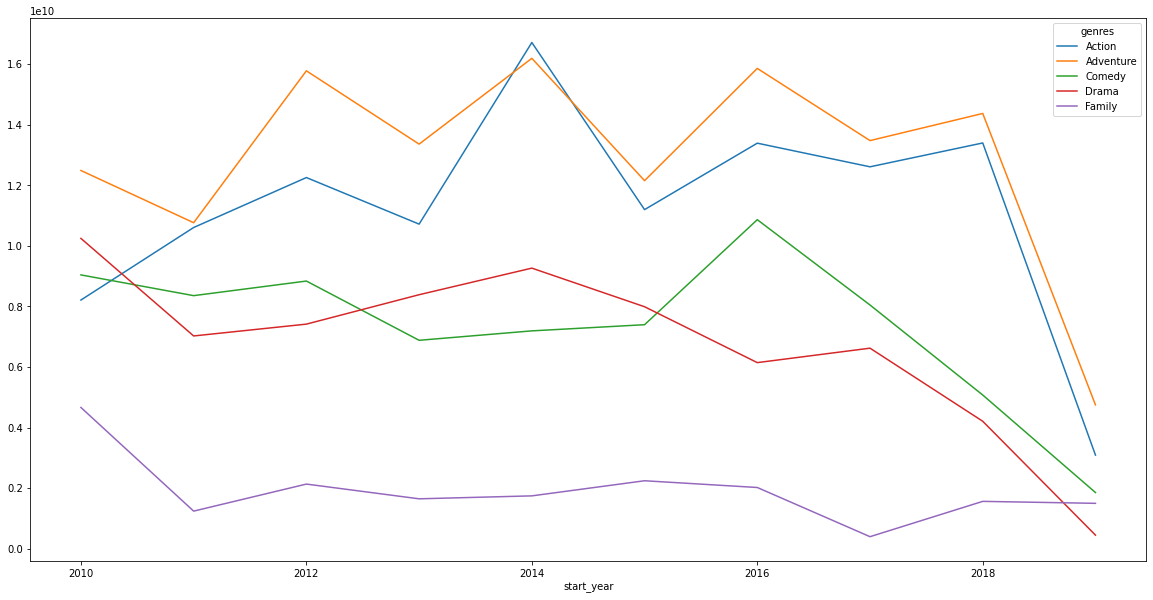

In [54]:
top5_movie_type_yearly_change1.plot(figsize=(20, 10))

## Question 2

In [40]:
#To increase world gross of a movie, which element should be top priority? and which one is last one to be considered?

### Q2 conclusion

In [41]:
#Within movie time length between 130-150 mins, budget should be considered most, and movie time is less impact to gross.

<AxesSubplot:xlabel='runtime_minutes'>

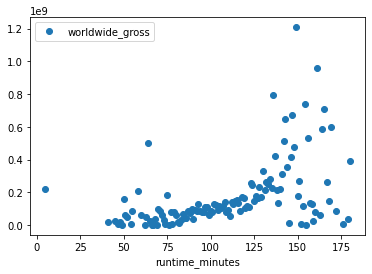

In [80]:
movie_rating_time.plot(x='runtime_minutes', y='worldwide_gross', style='o')

In [42]:
movie_rating.corr()["worldwide_gross"].nsmallest(3)

id                -0.037656
profit_ratio       0.080536
runtime_minutes    0.300475
Name: worldwide_gross, dtype: float64

In [43]:
movie_rating.corr()['worldwide_gross'].nlargest(2)

worldwide_gross      1.000000
production_budget    0.782909
Name: worldwide_gross, dtype: float64

## Question 3

In [44]:
#Best Three director

### Q3 conclusion

In [45]:
#Orson Welles, Woody Allen, Luc Besson. Woody Allen should be hired as he is highest rate director alive.

In [46]:
movie_rating_with_director_top10.head(3)

,averagerating,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,6.90,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer","tt0048393,tt0052311,tt0057427,tt0033467"
1,6.70,nm0000095,Woody Allen,1935.0,NaN,"writer,director,actor","tt0091167,tt0079522,tt0075686,tt0097123"
2,6.36,nm0000108,Luc Besson,1959.0,NaN,"writer,producer,director","tt2872732,tt0119116,tt0110413,tt0100263"


# Conclusion / Recommendations

In [47]:
#Most profit movie would be advanture type with suficient budgets, top 3 rate movie diretor are Orson Welles, Woody Allen, Luc Besson.

# Future Work

In [48]:
#With more time, I would like to dig into relationship between crews, try to find a best coroperation team.